## Mounting disk

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Importing dataset and getting basic information about it

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IPD/code/text/english/Ethos_Dataset_Binary.csv", on_bad_lines='skip')
df.describe()

,comment;isHate,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,998,242,95,48,20,14,7,5,3,3,2,1,1
unique,998,241,95,48,20,14,7,5,3,3,2,1,1
top,You should know women's sports are a joke;1.0,of course,egyptian shitskins,palirats,syrian and iraqi scums,they're all dogs that behave like niggers,they cost too much,especially syrians,there is way too many of them here,they are arrogant ungrateful backstabbing ape...,and make a law to stop anti Muslim hate and r...,look at them & their story as their own. They...,& we will not all do the same thing after the...
freq,1,2,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.head()

,comment;isHate,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,You should know women's sports are a joke;1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,You look like Sloth with deeper Down’s syndrom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,You look like Russian and speak like Indian. B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Women deserve to be abused I guess.;1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Women are made for making babies and cooking d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['correct'] = df.iloc[:, 0].str.split(';')

In [ ]:
df = df['correct']

In [ ]:
df.head()

0     [You should know women's sports are a joke, 1.0]
1    [You look like Sloth with deeper Down’s syndro...
2    [You look like Russian and speak like Indian. ...
3           [Women deserve to be abused I guess., 1.0]
4    [Women are made for making babies and cooking ...
Name: correct, dtype: object

In [ ]:
df = df.apply(pd.Series)

In [ ]:
df.head()

,0,1,2,3,4,5
0,You should know women's sports are a joke,1.0,NaN,NaN,NaN,NaN
1,You look like Sloth with deeper Down’s syndrome,1.0,NaN,NaN,NaN,NaN
2,You look like Russian and speak like Indian. B...,1.0,NaN,NaN,NaN,NaN
3,Women deserve to be abused I guess.,1.0,NaN,NaN,NaN,NaN
4,Women are made for making babies and cooking d...,1.0,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=[2,3,4,5], inplace=True)

In [ ]:
df.columns = ['text', 'hate_score']
df.head()

,text,hate_score
0,You should know women's sports are a joke,1.0
1,You look like Sloth with deeper Down’s syndrome,1.0
2,You look like Russian and speak like Indian. B...,1.0
3,Women deserve to be abused I guess.,1.0
4,Women are made for making babies and cooking d...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        998 non-null    object
 1   hate_score  756 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [ ]:
df = df.dropna()

In [ ]:
df['hate_score'] = pd.to_numeric(df['hate_score'], errors='coerce')

In [ ]:
df = df.dropna(subset=['hate_score'])

In [ ]:
df = df.drop(df[df['hate_score'].apply(lambda x: isinstance(x, str))].index)

In [ ]:
df['hate_score'] = df['hate_score'].apply(lambda x: 1 if x > 0.75 else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        754 non-null    object
 1   hate_score  754 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


In [ ]:
df.describe()

,hate_score
count,754.000000
mean,0.286472
std,0.452413
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.head()

,text,hate_score
0,You should know women's sports are a joke,1
1,You look like Sloth with deeper Down’s syndrome,1
2,You look like Russian and speak like Indian. B...,1
3,Women deserve to be abused I guess.,1
4,Women are made for making babies and cooking d...,1


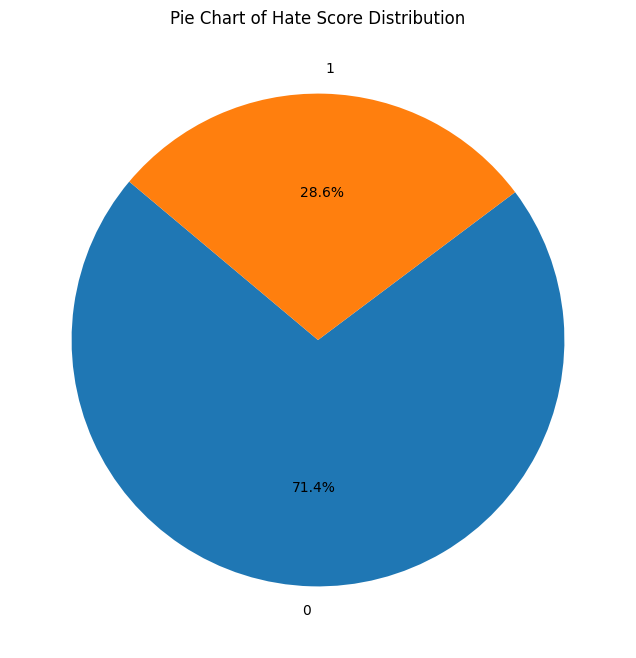

In [ ]:
value_counts = df['hate_score'].value_counts(normalize=True) * 100

filtered_values = value_counts[value_counts > 5]

plt.figure(figsize=(8, 8))
plt.pie(filtered_values, labels=filtered_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Hate Score Distribution')
plt.show()

## Text Preprocessing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [ ]:
tokenizer = Tokenizer()
max_len = 100

tokenizer.fit_on_texts(df['preprocessed_text'])
X = tokenizer.texts_to_sequences(df['preprocessed_text'])
X = pad_sequences(X, maxlen=max_len)

In [ ]:
sequence_lengths = [len(seq) for seq in X]
max_len = max(sequence_lengths)

In [ ]:
from keras.utils import to_categorical
y = to_categorical(df['hate_score'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

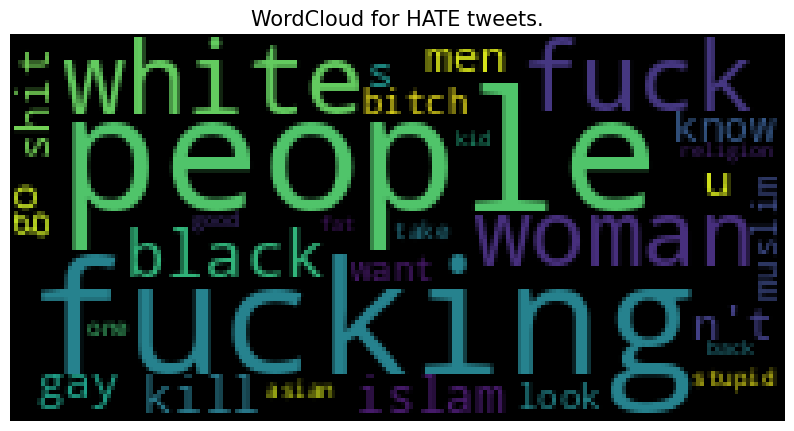

In [ ]:
def plot_word_cloud(data, typ):
  tweet_corpus = " ".join(data['preprocessed_text'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(tweet_corpus)

  plt.title(f'WordCloud for {typ} tweets.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['hate_score']>=0.75], typ='HATE')

In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((603, 100), (151, 100), (603, 2), (151, 2))

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
y_train_binary = np.argmax(y_train, axis=1)
y_val_binary = np.argmax(y_val, axis=1)

## Model Development

In [ ]:
max_words = 100

In [ ]:
from keras.callbacks import EarlyStopping

model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           3200      
                                                                 
 bidirectional (Bidirection  (None, 32)                6272      
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

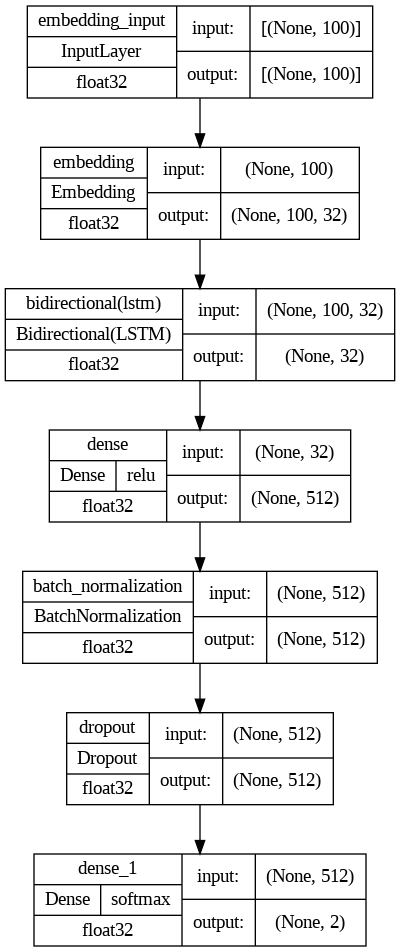

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    verbose=1,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node sequential/embedding/embedding_lookup defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-35-06d4c28ec15f>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 272, in call

indices[28,97] = 430 is not in [0, 100)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_train_function_6375]